In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
from sklearn import metrics
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split


# Common imports
import numpy as np
import pandas as pd
import os


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [5]:
brain = pd.read_csv('C:/Users/pavan/Desktop/dataset/F21DL-main/brain_stroke_in_numeric_without_useless_data.csv')
brain = brain.drop(brain.columns[0], axis=1)
brain_pca = pd.read_csv('C:/Users/pavan/Desktop/dataset/F21DL-main/brain_stroke_after_pca.csv')
brain_pca = brain_pca.drop(brain_pca.columns[0], axis=1) 
print(brain)

      gender   age  hypertension  heart_disease  ever_married  \
0          0  67.0             0              1             1   
1          0  80.0             0              1             1   
2          1  49.0             0              0             1   
3          1  79.0             1              0             1   
4          0  81.0             0              0             1   
...      ...   ...           ...            ...           ...   
4976       0  41.0             0              0             0   
4977       0  40.0             0              0             1   
4978       1  45.0             1              0             1   
4979       0  40.0             0              0             1   
4980       1  80.0             1              0             1   

      avg_glucose_level   bmi  smoking_status  stroke  
0                228.69  36.6               2       1  
1                105.92  32.5               1       1  
2                171.23  34.4               3      

In [6]:
brain.head()


,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,228.69,36.6,2,1
1,0,80.0,0,1,1,105.92,32.5,1,1
2,1,49.0,0,0,1,171.23,34.4,3,1
3,1,79.0,1,0,1,174.12,24.0,1,1
4,0,81.0,0,0,1,186.21,29.0,2,1


In [8]:
brain = brain.drop(['ever_married','smoking_status'], axis=1)
brain.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,67.0,0,1,228.69,36.6,1
1,0,80.0,0,1,105.92,32.5,1
2,1,49.0,0,0,171.23,34.4,1
3,1,79.0,1,0,174.12,24.0,1
4,0,81.0,0,0,186.21,29.0,1


In [9]:
X = brain.drop('stroke', axis =1).copy()
X.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi
0,0,67.0,0,1,228.69,36.6
1,0,80.0,0,1,105.92,32.5
2,1,49.0,0,0,171.23,34.4
3,1,79.0,1,0,174.12,24.0
4,0,81.0,0,0,186.21,29.0


In [10]:
Y = brain['stroke'].copy()
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [11]:
X.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
dtype: object

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42)

In [14]:
tree_clf  = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,Y_train)


DecisionTreeClassifier(random_state=42)

[Text(0.3739796432023196, 0.9761904761904762, 'age <= 56.5\ngini = 0.091\nsamples = 3735\nvalue = [3556, 179]\nclass = unstroked'),
 Text(0.07908847454896907, 0.9285714285714286, 'age <= 37.5\ngini = 0.022\nsamples = 2536\nvalue = [2508, 28]\nclass = unstroked'),
 Text(0.012371134020618556, 0.8809523809523809, 'age <= 31.5\ngini = 0.001\nsamples = 1485\nvalue = [1484, 1]\nclass = unstroked'),
 Text(0.008247422680412371, 0.8333333333333334, 'gini = 0.0\nsamples = 1215\nvalue = [1215, 0]\nclass = unstroked'),
 Text(0.016494845360824743, 0.8333333333333334, 'age <= 32.5\ngini = 0.007\nsamples = 270\nvalue = [269, 1]\nclass = unstroked'),
 Text(0.012371134020618556, 0.7857142857142857, 'avg_glucose_level <= 76.645\ngini = 0.037\nsamples = 53\nvalue = [52, 1]\nclass = unstroked'),
 Text(0.008247422680412371, 0.7380952380952381, 'avg_glucose_level <= 75.165\ngini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = unstroked'),
 Text(0.004123711340206186, 0.6904761904761905, 'gini = 0.0\nsamples 

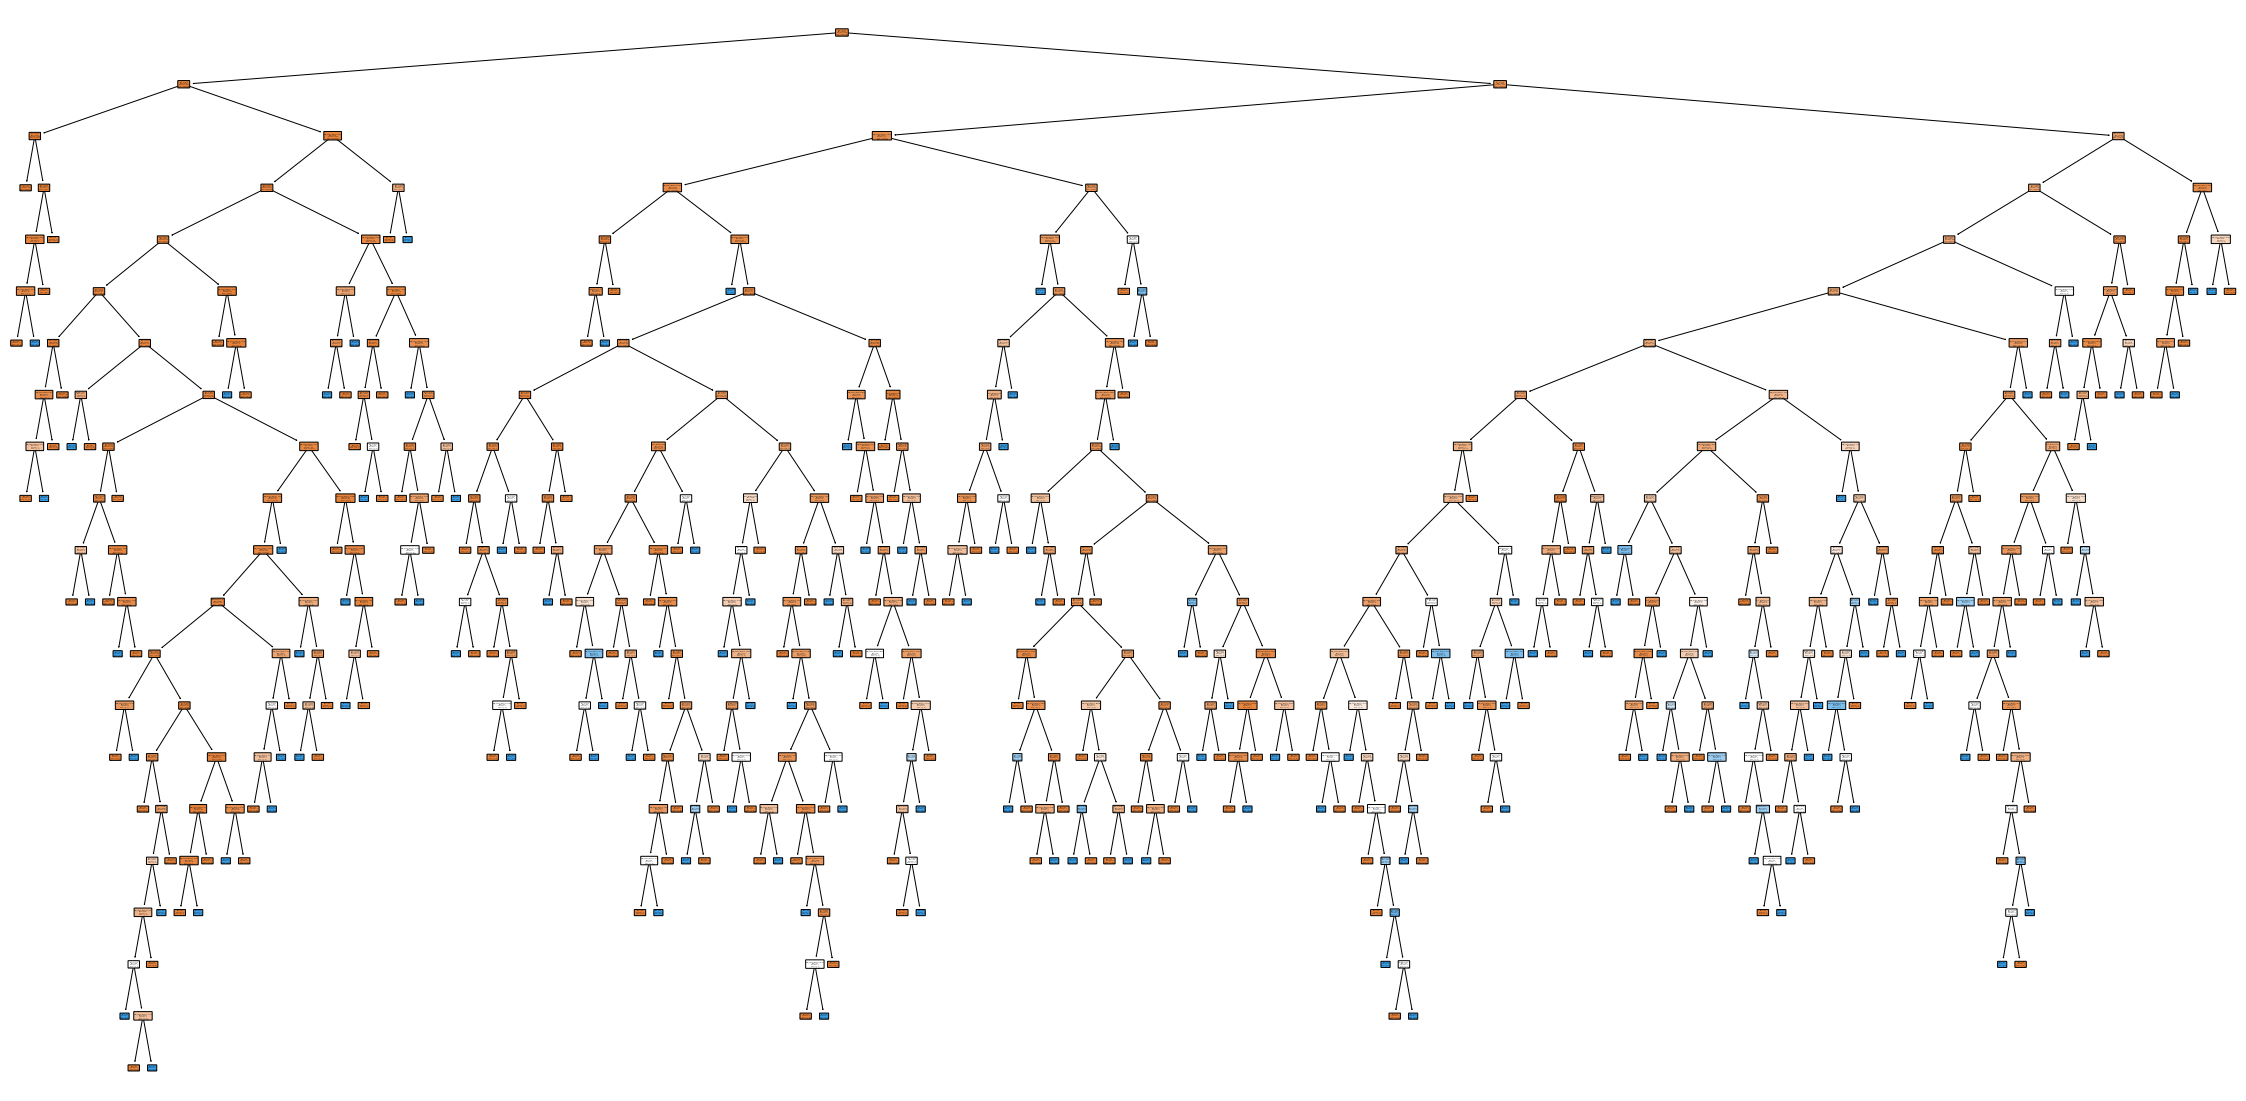

In [15]:
plt.figure(figsize=(40,20))
plot_tree(tree_clf,filled=True,rounded=True,class_names=["unstroked","stroke"],feature_names=X.columns)

In [16]:
## Evaluation of the Model

In [17]:
print("train accuracy:", tree_clf.score(X_train, Y_train))

train accuracy: 1.0


In [18]:
print("test accuracy:", clf_dt.score(X_test,Y_test))

test accuracy: 0.9036918138041734


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


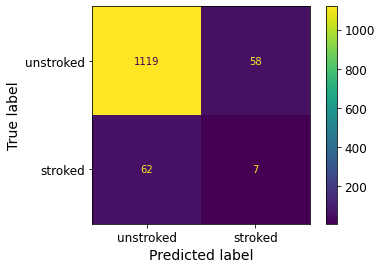

In [20]:
plot_confusion_matrix(tree_clf,X_test,Y_test,display_labels=["unstroked","stroked"])

In [21]:
# Pruning

In [22]:
path = tree_clf.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas = path.ccp_alphas # Getting different values of alpha(Prunig parameter)
ccp_alphas = ccp_alphas[:-1] # exclude maximum

trees_clf=[]

for ccp_alpha in ccp_alphas:
    tree_clf = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    tree_clf.fit(X_train,Y_train)
    trees_clf.append(tree_clf)

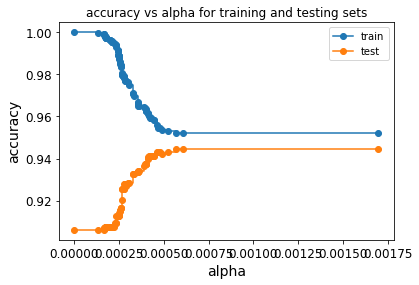

In [23]:
train_scores = [tree_clf.score(X_train,Y_train) for tree_clf in  trees_clf]
test_scores = [tree_clf.score(X_test,Y_test) for tree_clf in  trees_clf]

fit, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [24]:
tree_clf_pruned= DecisionTreeClassifier(random_state=42, ccp_alpha = 0.038)

<AxesSubplot:xlabel='tree'>

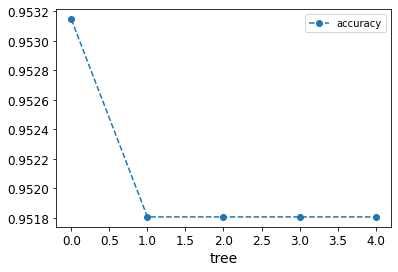

In [26]:
scores = cross_val_score(tree_clf_pruned,X_train,Y_train, cv=5)
brain= pd.DataFrame(data={'tree':range(5), 'accuracy':scores})
brain.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [32]:
tree_clf_pruned = tree_clf_pruned.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


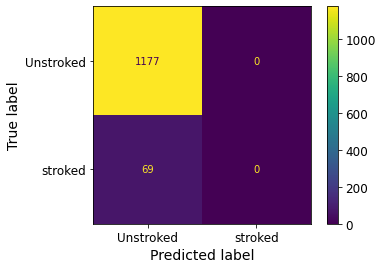

In [33]:
plot_confusion_matrix(tree_clf,X_test,Y_test,display_labels=["Unstroked","stroked"])

In [34]:
print("test accuracy:", tree_clf_pruned.score(X_test,Y_test))

test accuracy: 0.9446227929373997


[Text(0.5, 0.5, 'gini = 0.091\nsamples = 3735\nvalue = [3556, 179]\nclass = Unstroked')]

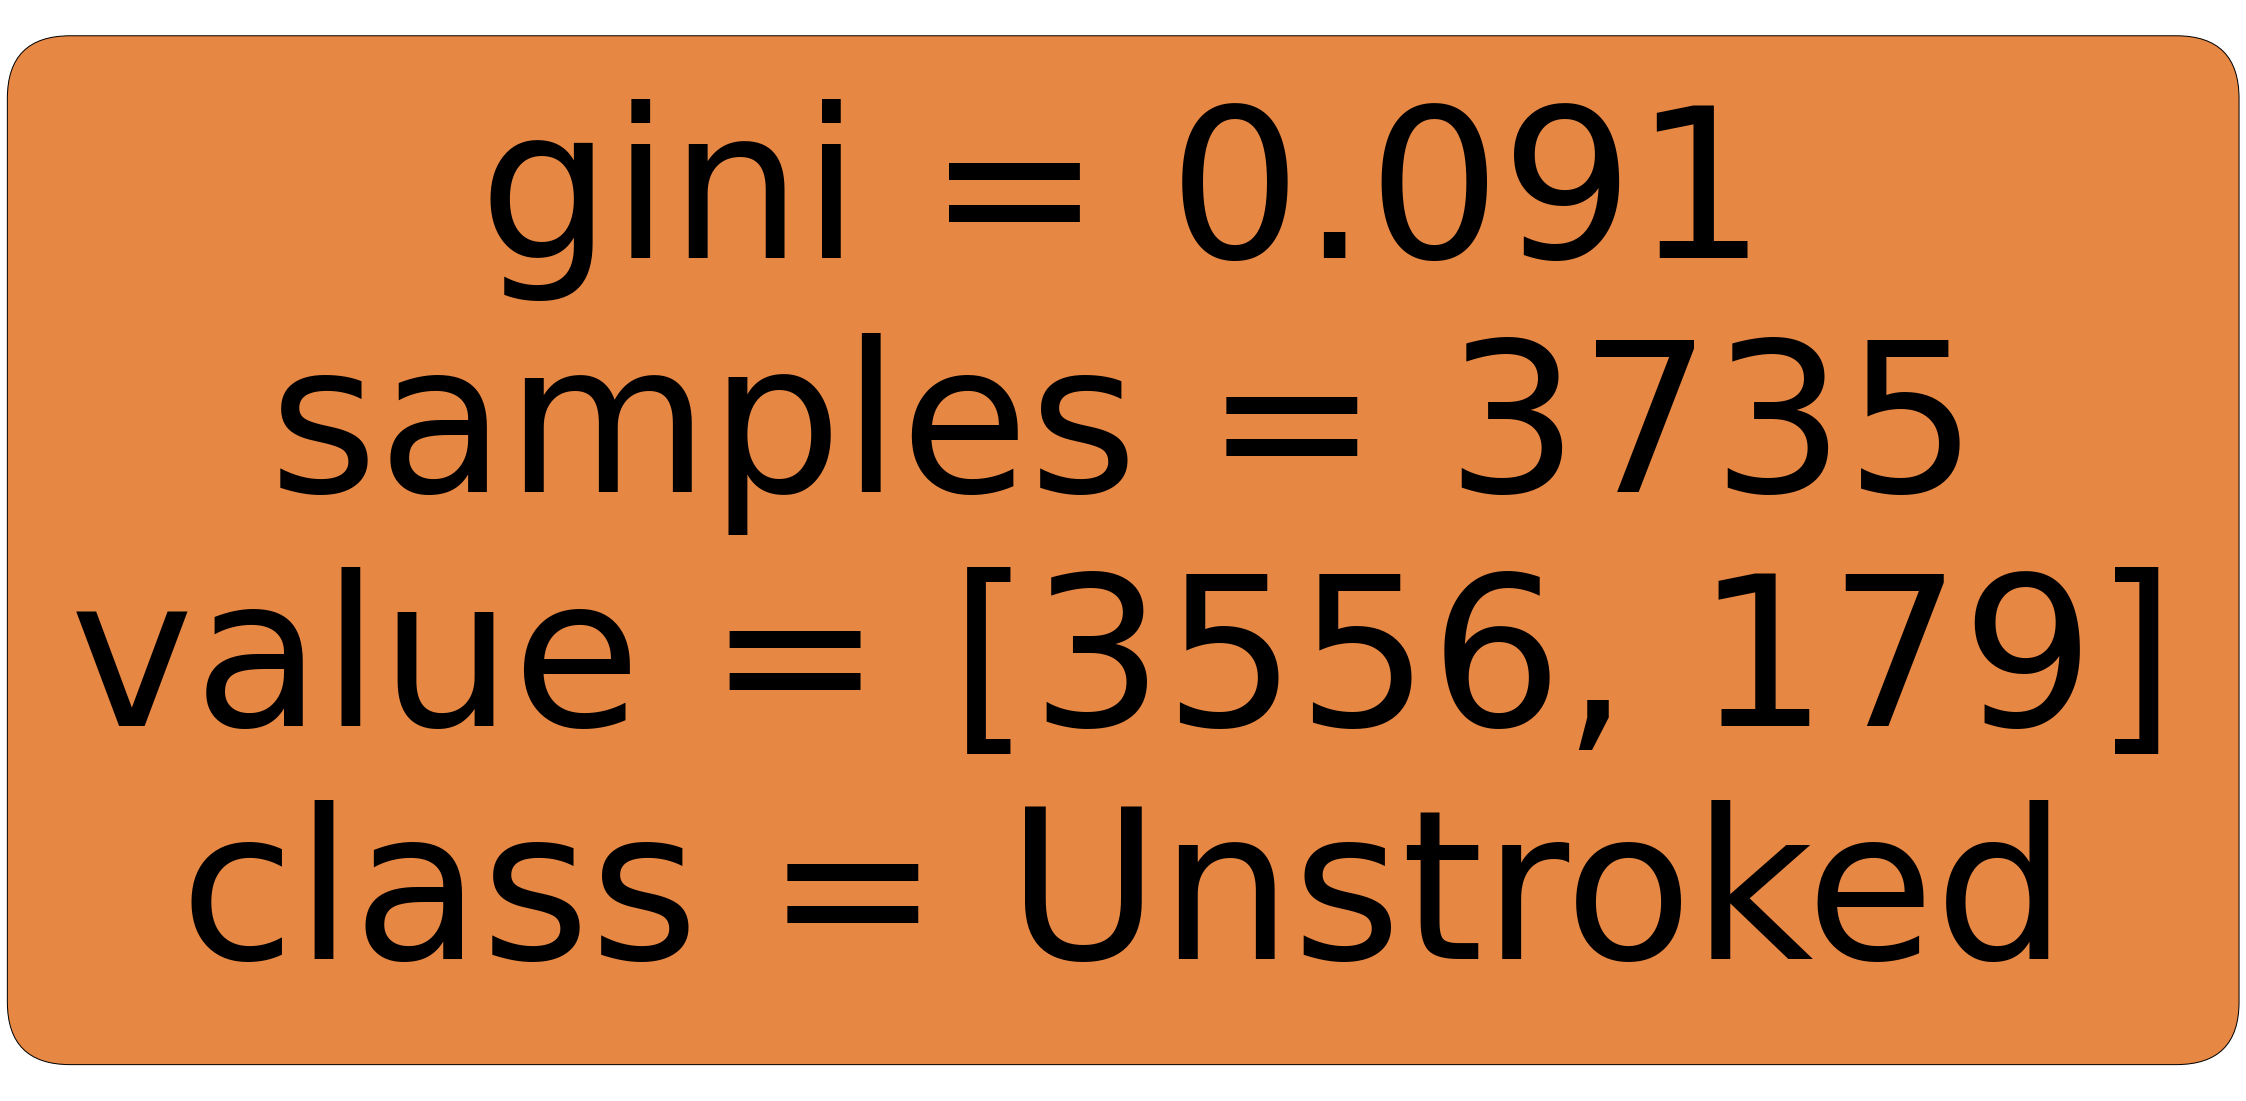

In [38]:
plt.figure(figsize=(40,20))
plot_tree(tree_clf_pruned,filled=True,rounded=True,class_names=["Unstroked","stroked"],feature_names=X.columns)

In [39]:
tree_clf_pruned2= DecisionTreeClassifier(random_state=42, ccp_alpha = 0.040)

In [40]:
tree_clf_pruned2 = tree_clf_pruned2.fit(X_train,Y_train)

[Text(0.5, 0.5, 'gini = 0.091\nsamples = 3735\nvalue = [3556, 179]\nclass = Unstroked')]

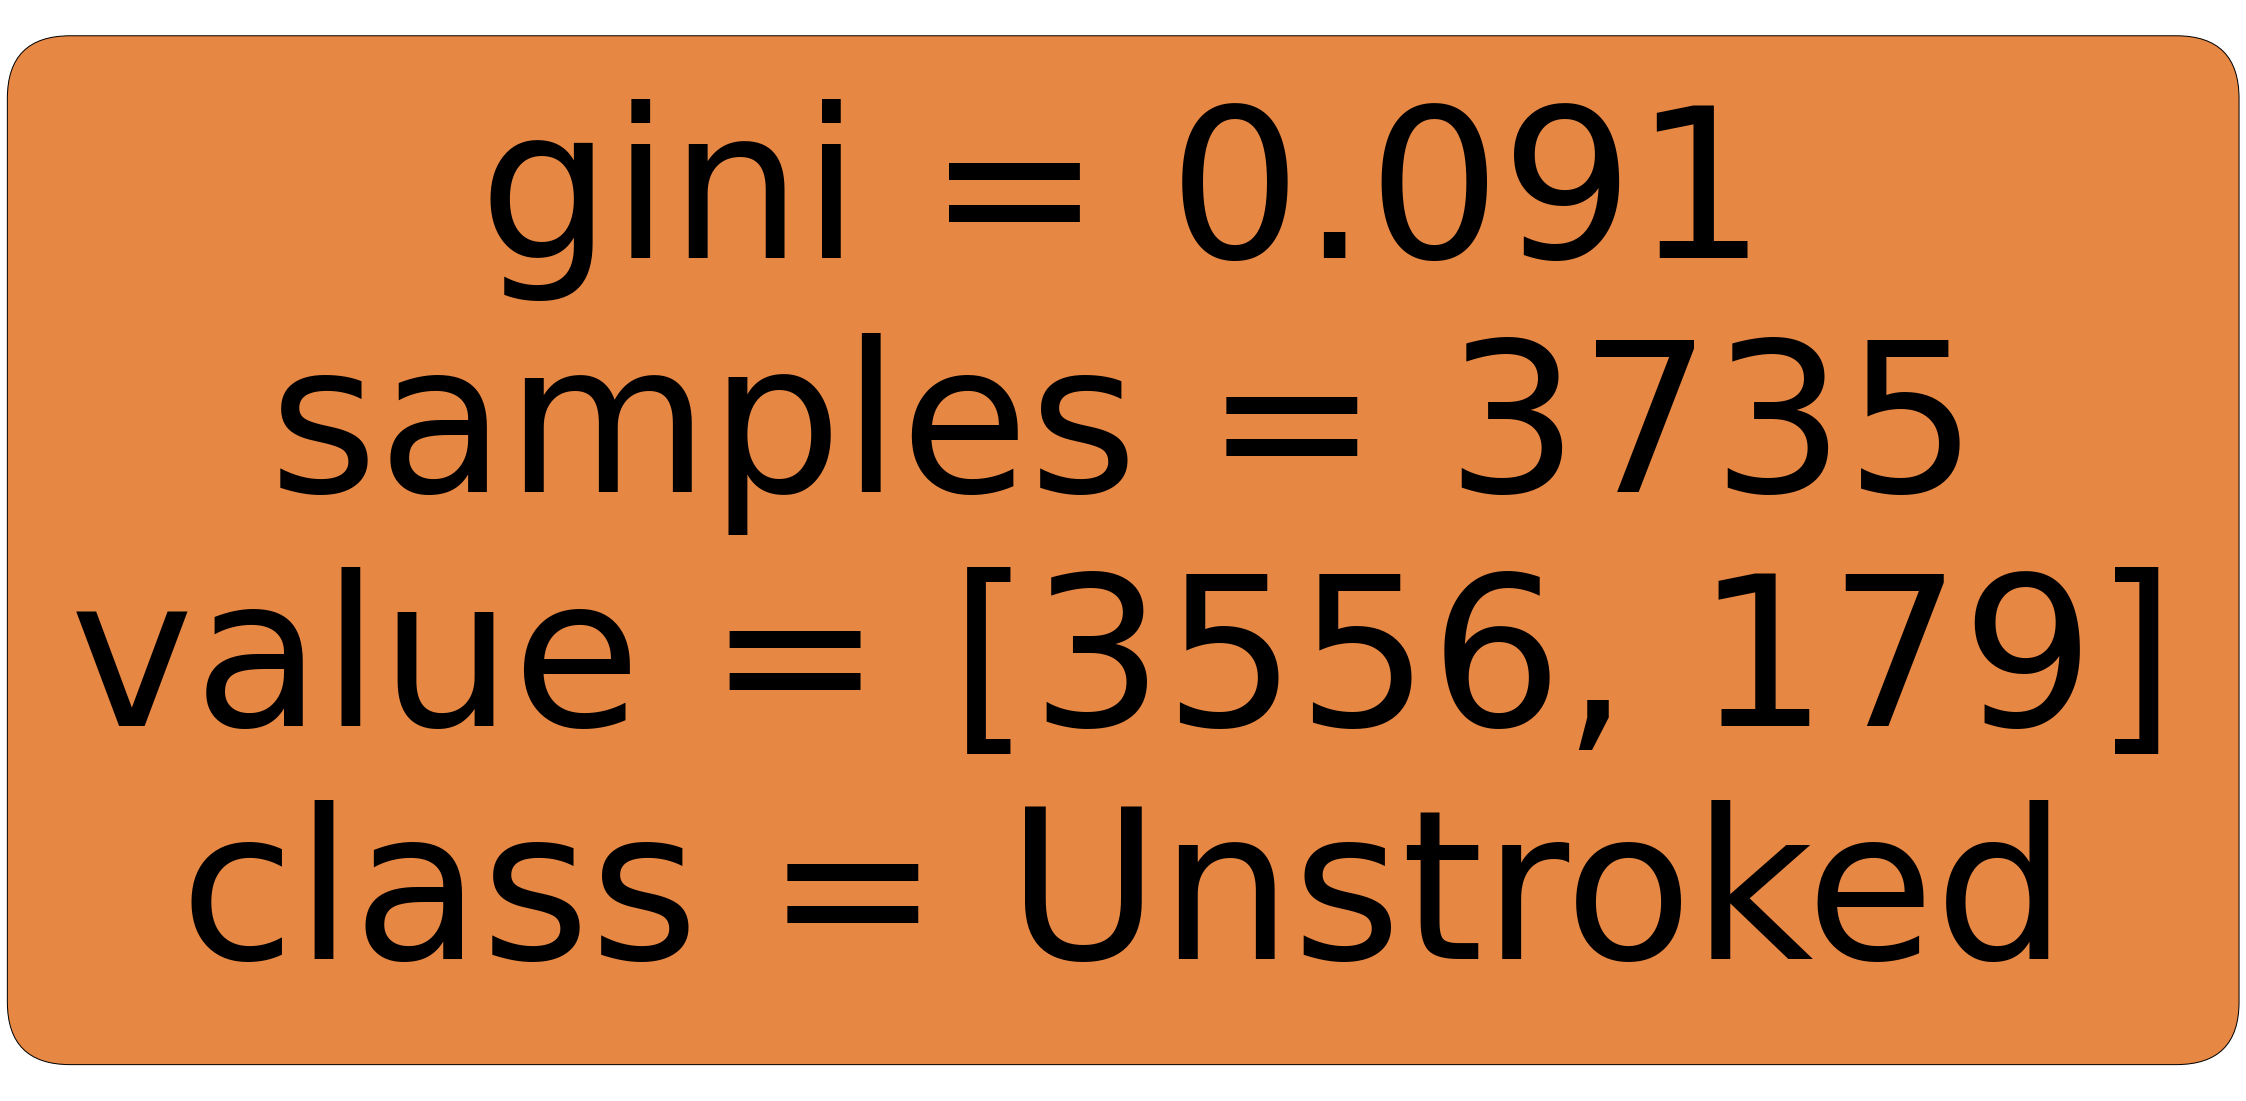

In [42]:
plt.figure(figsize=(40,20))
plot_tree(tree_clf_pruned2,filled=True,rounded=True,class_names=["Unstroked","stroked"],feature_names=X.columns)